In [8]:
%config Completer.use_jedi=False

In [9]:
import os
import pandas as pd
import numpy as np
import json
import cv2
from pathlib import Path
from matplotlib import pyplot as plt

from src.utils import annotation2mask

from dotenv import load_dotenv

load_dotenv()

True

In [10]:
data_directory = Path(os.environ['dataset_path'])

In [11]:
image_id = '0030fd0e6378'
train_df = pd.read_csv(data_directory / 'train.csv')

In [12]:
cell_annotations = train_df.query(f"id=='{image_id}'").annotation

In [13]:
single_cell_masks = np.array(list(map(annotation2mask, cell_annotations)))

In [14]:
image_mask = np.sum(single_cell_masks, axis=0)
image_mask[image_mask > 1] = 1
yellow_mask = np.stack([image_mask, image_mask, np.zeros_like(image_mask)], axis=2)

In [15]:
image = cv2.imread(str(data_directory / 'train' / f'{image_id}.png'))

In [16]:
image_with_mask = np.array(image + 50 * yellow_mask, dtype=np.int32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


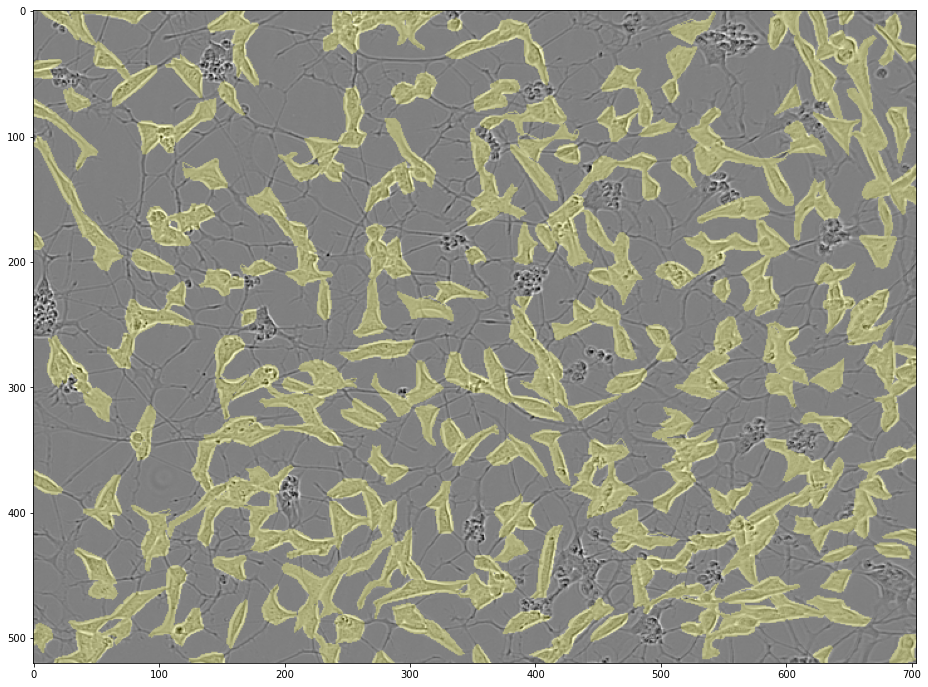

In [17]:
plt.subplots(figsize=(20, 12))
plt.imshow(image_with_mask)